## ANALYSIS OF AN IMAGE SEQUENCE AFTER DATA GENERATION USING THE CALCIUM CHARACTERIZATION PIPELINE

### Initialization

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram_by_dataset, 
    plot_pie_chart_by_dataset, 
    plot_raster,
    plot_bar_by_dataset,
    plot_histogram_by_group
    )
from calcium_activity_characterization.analysis.loaders import load_and_merge_datasets
from calcium_activity_characterization.analysis.statistics import analyze_peak_intervals

sns.set(style="whitegrid")

# Define paths to control datasets
control_paths = {
    "20250326 - IS1": "D:/Mateo/20250326/Output/IS1"
}

# Load and merge datasets
peaks = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/peaks.csv")
cells = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/cells.csv")
events = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/events.csv")

### Binary & Heatmap Raster Plot

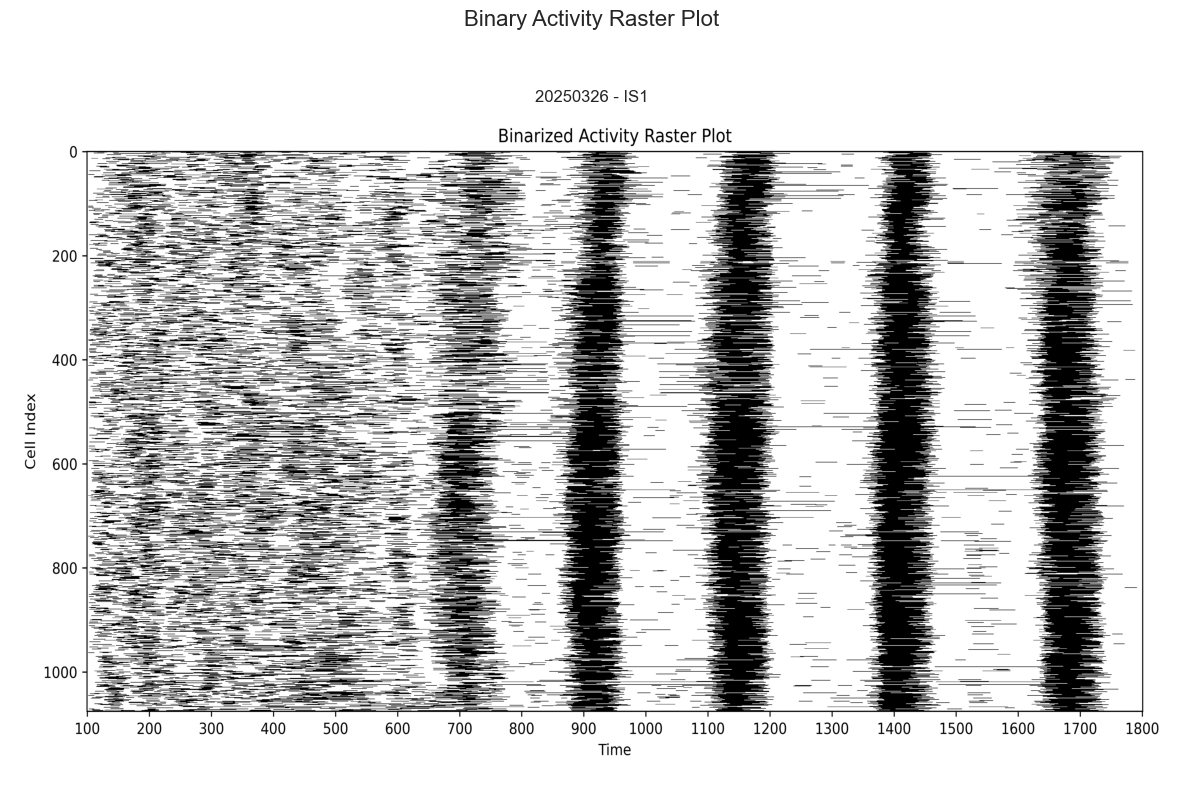

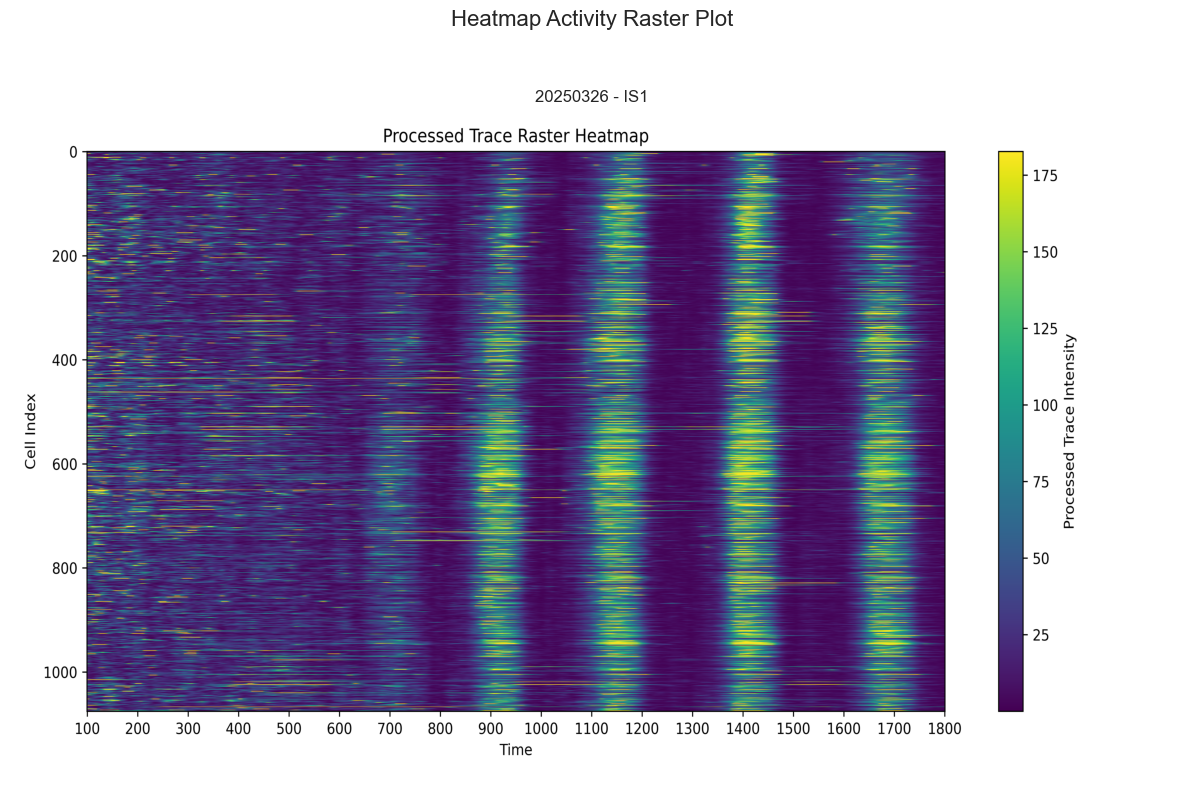

In [2]:
plot_raster(
    dataset_paths=control_paths,
    image_name="signal-processing/raster_plot.png",
    title="Binary Activity Raster Plot",
    n_cols=1,
    figsize_per_plot=(12, 8)
)
plot_raster(
    dataset_paths=control_paths,
    image_name="signal-processing/heatmap_raster.png",
    title="Heatmap Activity Raster Plot",
    n_cols=1,
    figsize_per_plot=(12, 8)
)

### Peaks population

In [3]:
print(f"Total number of peaks: {len(peaks)}")
print(f"Total number of cells: {len(cells)}")

Total number of peaks: 12046
Total number of cells: 1076


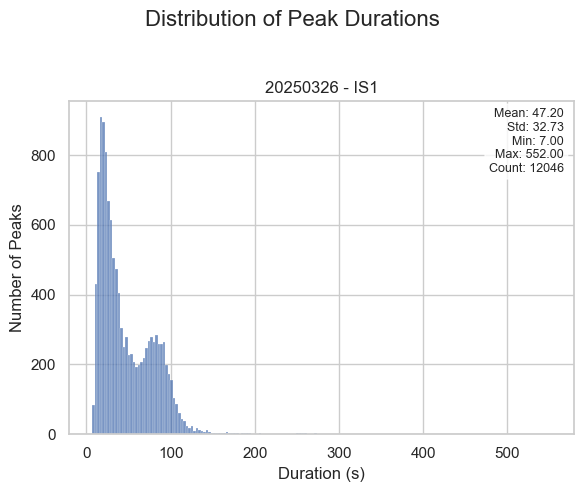

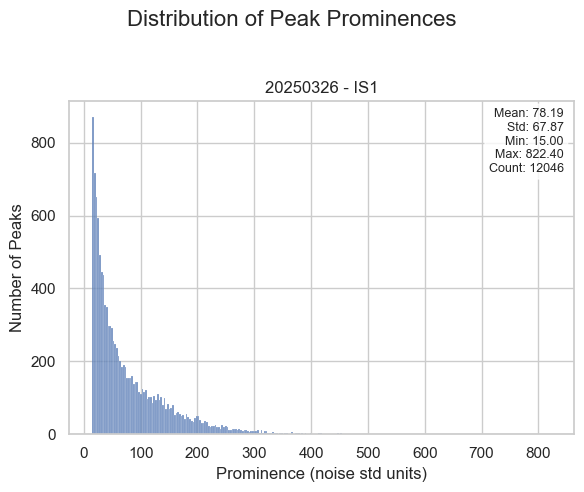

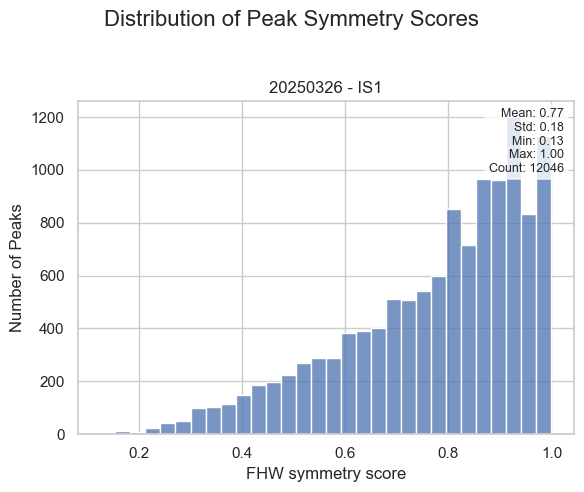

In [4]:
plot_histogram_by_dataset(
    df=peaks,
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks,
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks,
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
)

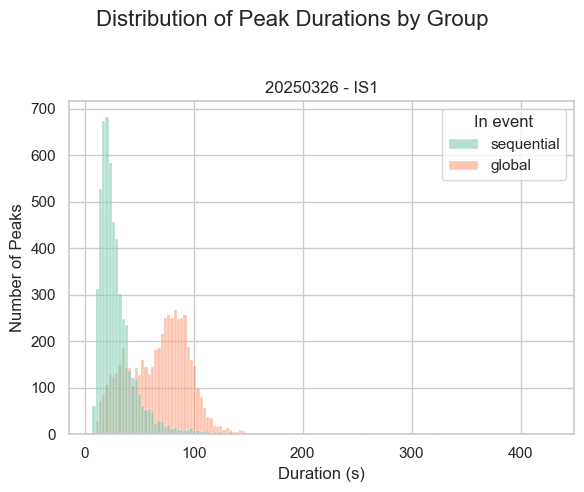

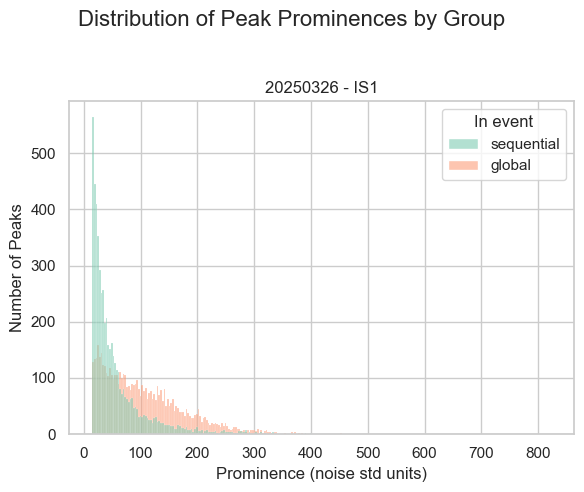

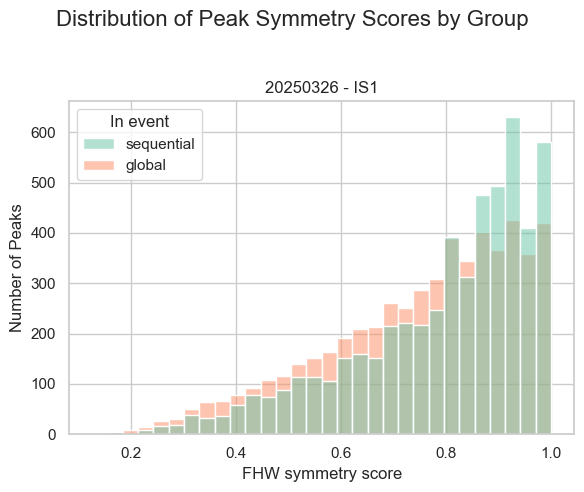

In [5]:
plot_histogram_by_group(
    df=peaks,
    value_column="Duration (s)",
    group_column="In event",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks,
    value_column="FHW symmetry score",
    group_column="In event",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)

### Categorized these peaks into different types of events

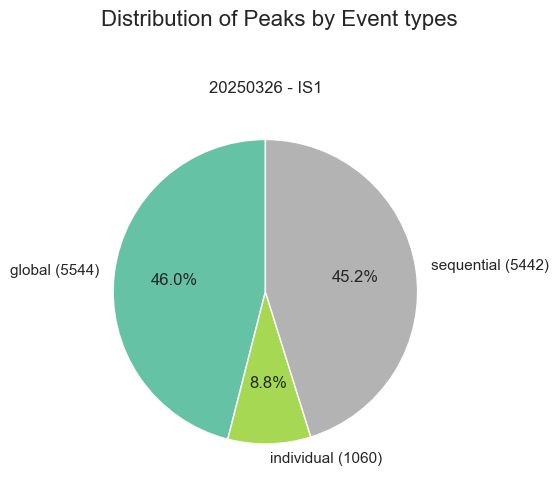

In [6]:
peaks["In event"] = peaks["In event"].fillna("individual")

plot_pie_chart_by_dataset(
    df=peaks,
    column="In event",
    title="Distribution of Peaks by Event types",
    n_cols=1,
    palette="Set2"
)

## GLOBAL EVENTS
### Peaks in global events

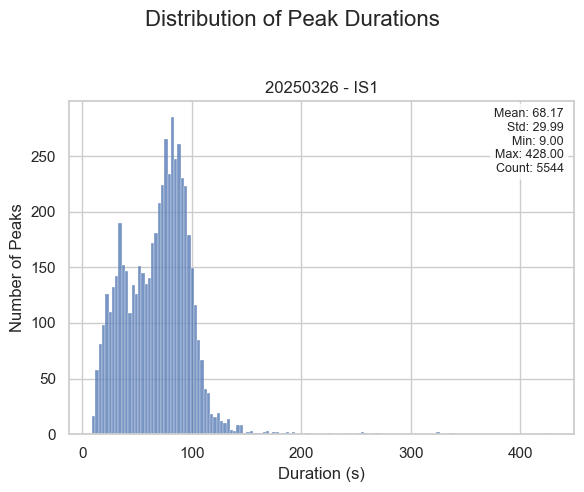

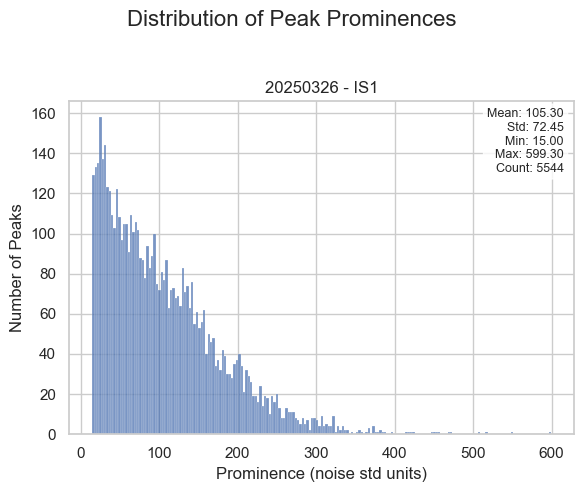

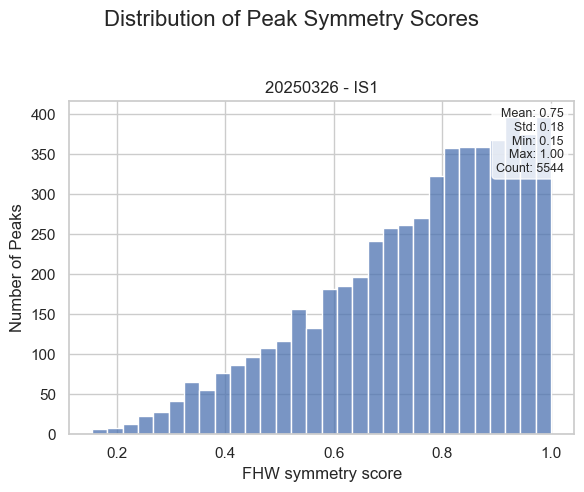

In [7]:
subset_peaks_in_global_events = peaks[peaks["In event"] == "global"]
plot_histogram_by_dataset(
    df=subset_peaks_in_global_events,
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=subset_peaks_in_global_events,
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=subset_peaks_in_global_events,
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
)

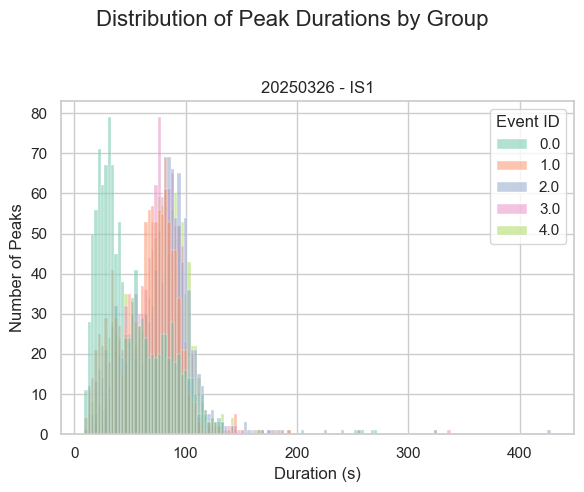

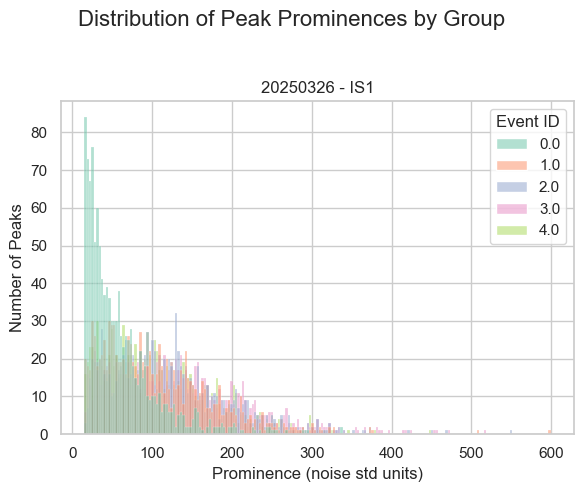

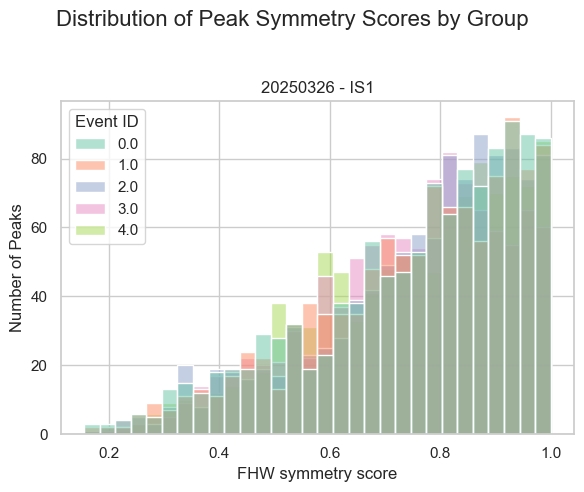

In [8]:
plot_histogram_by_group(
    df=subset_peaks_in_global_events,
    value_column="Duration (s)",
    group_column="Event ID",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=subset_peaks_in_global_events,
    value_column="Prominence (noise std units)",
    group_column="Event ID",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=subset_peaks_in_global_events,
    value_column="FHW symmetry score",
    group_column="Event ID",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:244: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


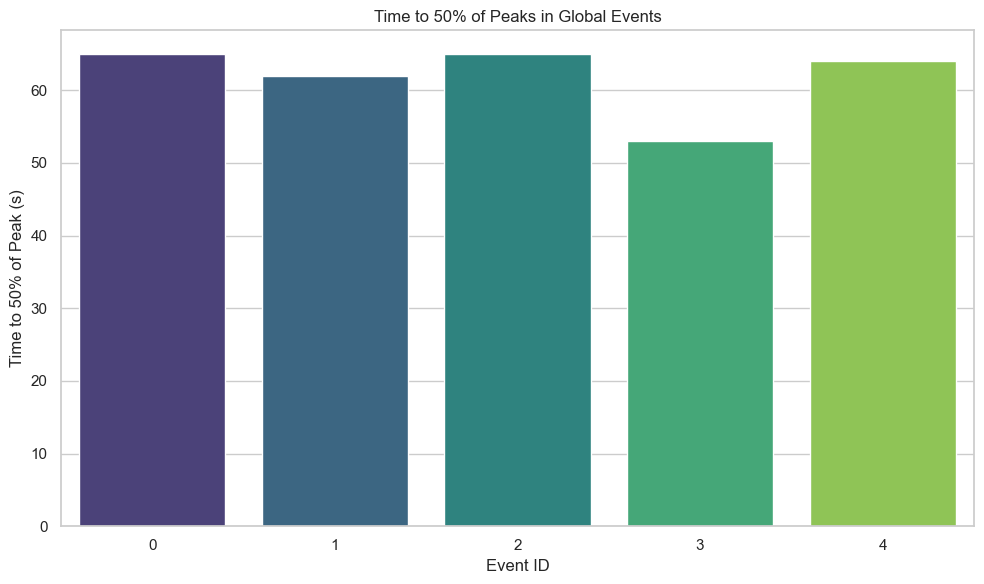

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:244: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


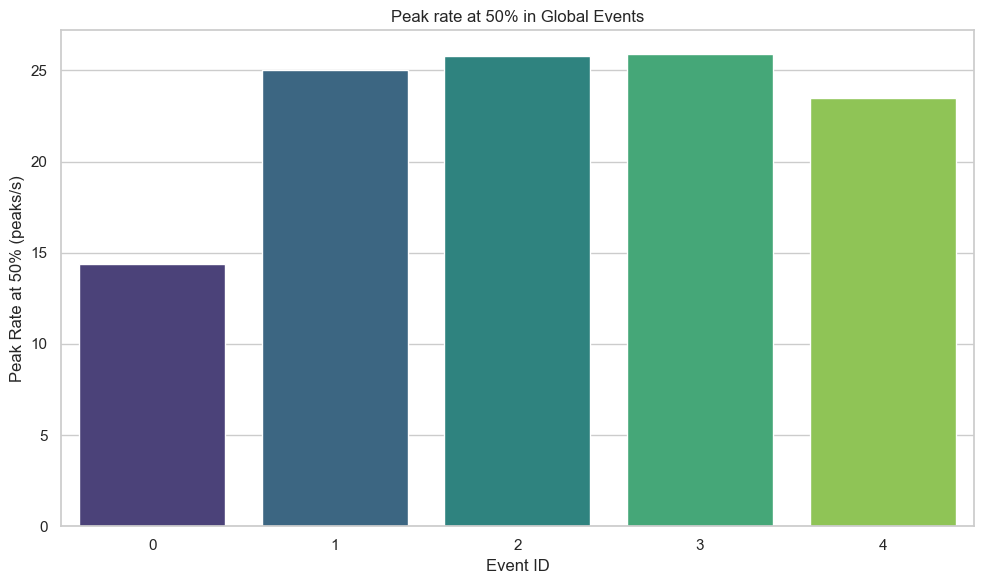

In [9]:
global_events = events[events["Event type"] == "GlobalEvent"]

plot_bar_by_dataset(
    df=global_events,
    axis_column="Event ID",
    value_column="Time to 50% (s)",
    title="Time to 50% of Peaks in Global Events",
    ylabel="Time to 50% of Peak (s)",
    xlabel="Event ID",
    rotation=0
)
plot_bar_by_dataset(
    df=global_events,
    axis_column="Event ID",
    value_column="Peak rate at 50% (peaks/s)",
    title="Peak rate at 50% in Global Events",
    ylabel="Peak Rate at 50% (peaks/s)",
    xlabel="Event ID",
    rotation=0
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:244: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


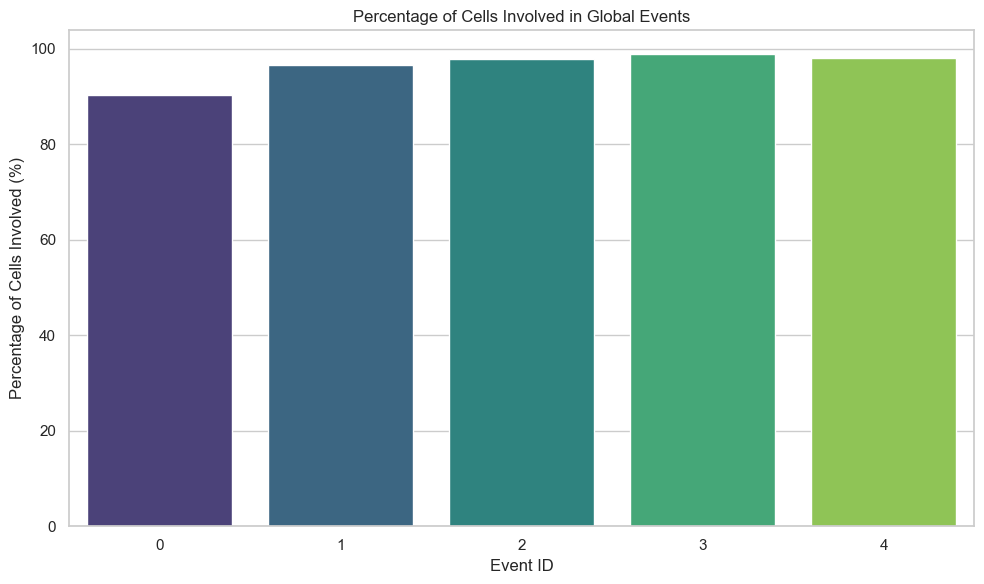

In [10]:
global_events = events[events["Event type"] == "GlobalEvent"].copy()
global_events["% of cells involved"] = 100 * global_events["Number of cells involved"] / len(cells)

plot_bar_by_dataset(
    df=global_events,
    axis_column="Event ID",
    value_column="% of cells involved",
    title="Percentage of Cells Involved in Global Events",
    ylabel="Percentage of Cells Involved (%)",
    xlabel="Event ID",
    rotation=0
)

In [11]:
global_event_peak_times = events[events["Event type"] == "GlobalEvent"]["Event peak time (s)"].tolist()

intervals, periodicity, frequency = analyze_peak_intervals(global_event_peak_times)

print(f"Intervals between global event peaks: {intervals}")

if periodicity is not None:
    print(f"Estimated periodicity: {periodicity:.3f}")

if periodicity is not None and periodicity > 0.8:
    print("The global events exhibit a regular periodic pattern.")
    print(f"Estimated frequency (1/mean interval): {frequency:.3f} Hz")

Intervals between global event peaks: [209.0, 228.0, 260.0, 266.0]
Estimated periodicity: 0.912
The global events exhibit a regular periodic pattern.
Estimated frequency (1/mean interval): 0.004 Hz


## SEQUENTIAL EVENTS

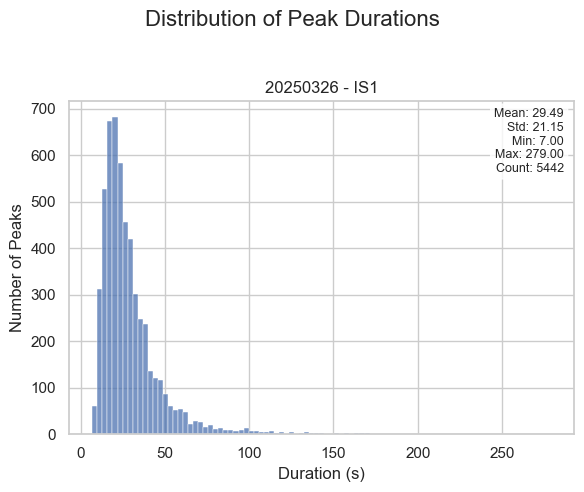

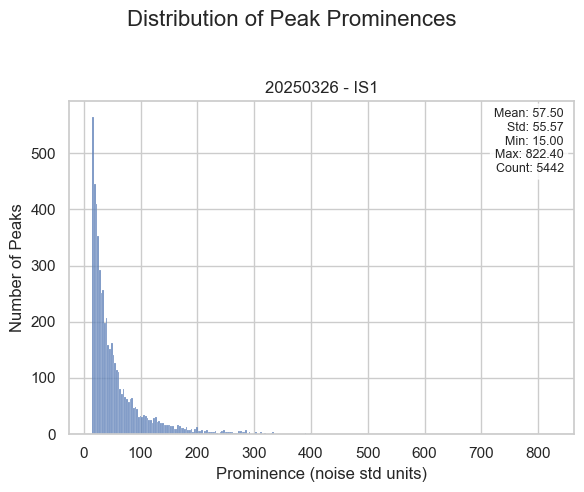

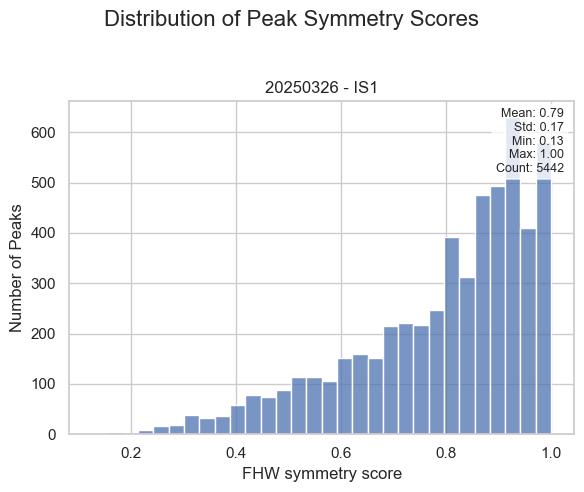

In [12]:
subset_peaks_in_sequential_events = peaks[peaks["In event"] == "sequential"]
plot_histogram_by_dataset(
    df=subset_peaks_in_sequential_events,
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=subset_peaks_in_sequential_events,
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=subset_peaks_in_sequential_events,
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
)

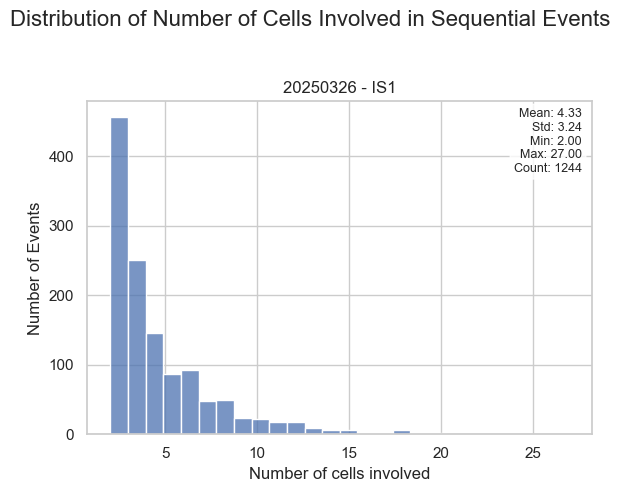

Disclaimer: this is the mean not the distribution of the communication speed between 2 cells.


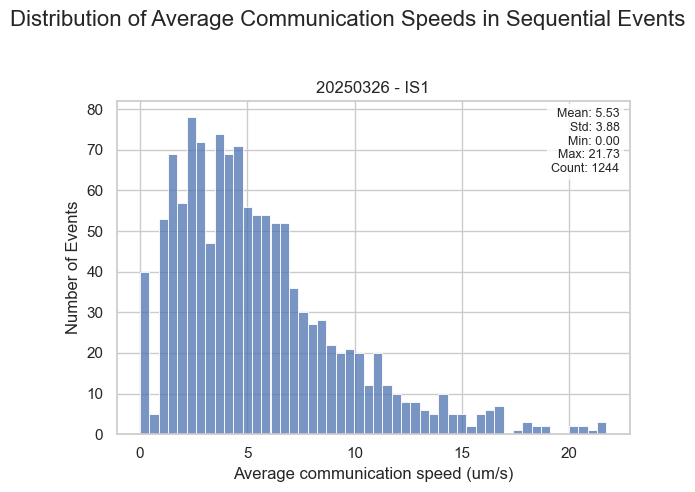

In [13]:
sequential_events = events[events["Event type"] == "SequentialEvent"]
plot_histogram_by_dataset(
    df=sequential_events,
    column="Number of cells involved",
    title="Distribution of Number of Cells Involved in Sequential Events",
    ylabel="Number of Events",
    bin_width=1,
    n_cols=1
)
print("Disclaimer: this is the mean not the distribution of the communication speed between 2 cells.")
plot_histogram_by_dataset(
    df=sequential_events,
    column="Average communication speed (um/s)",
    title="Distribution of Average Communication Speeds in Sequential Events",
    ylabel="Number of Events",
    bin_count=50,
    n_cols=1
)

### SEQUENTIAL CORRELATION BETWEEN CELLS

In [14]:
# Count number of peaks labeled as 'origin' of a 'sequential' event for each cell
origin_sequential_counts = peaks[
    (peaks["Origin type"] == "origin") & (peaks["In event"] == "sequential")
].groupby("Cell ID").size()

cells["Number of seq. events origin peaks"] = cells["Cell ID"].map(origin_sequential_counts).fillna(0).astype(int)

cells.sort_values("Number of seq. events origin peaks", ascending=False).head(30)

,Cell ID,Centroid X coordinate (um),Centroid Y coordinate (um),Number of peaks,Is active,Peak frequency (Hz),Periodicity score,dataset,Number of seq. events origin peaks
1045,1161,296.40,477.10,21,True,0.0120,0.53,20250326 - IS1,6
361,419,11.38,177.78,19,True,0.0110,0.54,20250326 - IS1,5
481,548,398.45,234.65,12,True,0.0071,0.63,20250326 - IS1,5
216,254,368.55,107.25,14,True,0.0082,0.60,20250326 - IS1,5
645,728,193.38,307.45,13,True,0.0076,0.63,20250326 - IS1,5
162,198,49.40,83.20,14,True,0.0082,0.60,20250326 - IS1,5
841,941,280.48,391.30,16,True,0.0094,0.53,20250326 - IS1,5
214,251,419.25,106.60,25,True,0.0150,0.69,20250326 - IS1,5
439,501,144.62,214.18,14,True,0.0082,0.62,20250326 - IS1,4
206,243,50.05,105.62,13,True,0.0076,0.63,20250326 - IS1,4


In [15]:
cells["Ratio of seq. events origin peaks"] = cells["Number of seq. events origin peaks"] / cells["Number of peaks"]

cells.sort_values("Ratio of seq. events origin peaks", ascending=False).head(30)

,Cell ID,Centroid X coordinate (um),Centroid Y coordinate (um),Number of peaks,Is active,Peak frequency (Hz),Periodicity score,dataset,Number of seq. events origin peaks,Ratio of seq. events origin peaks
481,548,398.45,234.65,12,True,0.0071,0.63,20250326 - IS1,5,0.416667
915,1020,12.03,420.88,10,True,0.0059,0.65,20250326 - IS1,4,0.400000
645,728,193.38,307.45,13,True,0.0076,0.63,20250326 - IS1,5,0.384615
164,200,183.62,85.15,11,True,0.0065,0.67,20250326 - IS1,4,0.363636
10,36,325.32,11.70,11,True,0.0065,0.64,20250326 - IS1,4,0.363636
730,817,326.62,344.50,11,True,0.0065,0.64,20250326 - IS1,4,0.363636
216,254,368.55,107.25,14,True,0.0082,0.60,20250326 - IS1,5,0.357143
162,198,49.40,83.20,14,True,0.0082,0.60,20250326 - IS1,5,0.357143
872,975,442.98,404.30,9,True,0.0053,0.68,20250326 - IS1,3,0.333333
204,241,118.95,103.67,12,True,0.0071,0.63,20250326 - IS1,4,0.333333


In [16]:
individual_peaks_counts = peaks[peaks["In event"] == "individual"].groupby("Cell ID").size()
cells["Number of individual peaks"] = cells["Cell ID"].map(individual_peaks_counts).fillna(0).astype(int)
cells["Ratio of individual peaks"] = cells["Number of individual peaks"] / cells["Number of peaks"]

cells.sort_values("Ratio of individual peaks", ascending=False).head(30)

,Cell ID,Centroid X coordinate (um),Centroid Y coordinate (um),Number of peaks,Is active,Peak frequency (Hz),Periodicity score,dataset,Number of seq. events origin peaks,Ratio of seq. events origin peaks,Number of individual peaks,Ratio of individual peaks
1067,1183,213.85,489.12,5,True,0.0029,0.55,20250326 - IS1,0,0.000000,3,0.600000
275,321,111.48,135.85,7,True,0.0041,0.66,20250326 - IS1,0,0.000000,4,0.571429
1074,1190,339.30,492.70,13,True,0.0076,0.61,20250326 - IS1,1,0.076923,6,0.461538
380,440,387.40,183.62,7,True,0.0041,0.77,20250326 - IS1,1,0.142857,3,0.428571
19,45,478.40,15.60,12,True,0.0071,0.61,20250326 - IS1,1,0.083333,5,0.416667
1060,1176,481.00,485.55,10,True,0.0059,0.64,20250326 - IS1,1,0.100000,4,0.400000
72,101,420.55,42.25,10,True,0.0059,0.68,20250326 - IS1,0,0.000000,4,0.400000
177,213,14.30,90.35,20,True,0.0120,0.54,20250326 - IS1,2,0.100000,8,0.400000
1059,1175,281.12,485.88,13,True,0.0076,0.66,20250326 - IS1,0,0.000000,5,0.384615
301,349,345.15,148.53,8,True,0.0047,0.66,20250326 - IS1,0,0.000000,3,0.375000
